In [90]:
from typing import TypedDict, List, Annotated
from dotenv import load_dotenv
from langgraph.graph import StateGraph, END
import operator

load_dotenv()

True

In [91]:
class SimpleState(TypedDict):
    count: int
    sum: int

def increment(state:SimpleState)->SimpleState:
    state['count'] = state['count'] + 1
    return state

def summation(state:SimpleState)->SimpleState:
    state['sum'] += state['count']
    return {"sum": state['sum']}

In [92]:
def should_continue(state:SimpleState)->str:
    if state['count'] < 5:
        return "continue"
    return "stop"

In [93]:
graph = StateGraph(SimpleState)
graph.add_node("counter", increment)
graph.add_node("summer", summation)

graph.set_entry_point("counter")
graph.add_edge("counter","summer")
graph.add_conditional_edges(
    "summer",
    should_continue,
    {
        "stop": END,
        "continue":"counter"
    }
)
app = graph.compile()

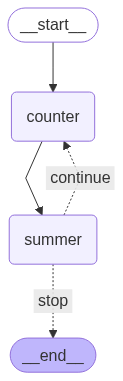

In [88]:
app

In [94]:
result= app.invoke({"count":0, "sum":0})
print(result)

{'count': 5, 'sum': 15}


In [84]:
SimpleState.count

AttributeError: type object 'SimpleState' has no attribute 'count'